In [2]:
# Import necessary libraries and create SomnofyAPISession object
from requests import Session
from urllib.parse import urljoin
import pandas as pd

class SomnofyAPISession(Session):
    def __init__(self, base_url=None, auth=None, verify=True, *args, **kwargs):
        super(SomnofyAPISession, self).__init__(*args, **kwargs)
        self.base_url = base_url
        self.auth = auth
        self.verify = verify

    def request(self, method, url, *args, **kwargs):
        url = urljoin(self.base_url, url)
        return super(SomnofyAPISession, self).request(method, url, auth=self.auth, verify=self.verify, *args, **kwargs)


In [3]:
USERNAME = 'cathy.wyse@mu.ie'
PASSWORD = 'Istabraq1'

In [11]:
# Initialize SomnofyAPISession
SAS = SomnofyAPISession('https://partner.api.somnofy.com', (USERNAME, PASSWORD))

# Get users from superuser
users = SAS.get('/v1/users', params={'limit': 100}).json()


#find the id you want
for user in users['_embedded']['users']:
    if user['display_name'] == 'Cathy Wyse':
        cathy = user['id']

# Get sessions from user
for user in users['_embedded']['users']:
    # Epoch data cannot be embedded in a call with multiple sessions, only report
    sessions = SAS.get('/v1/sessions', params={'user_id': cathy,
                                               'limit': 100000,
                                               'embed':'sleep_analysis.report'}).json()
    
     # Get session details
    for session in sessions['_embedded']['sessions']:
        # Session must be requested one by one with session and user_id to get 30s data
        session = SAS.get('/v1/sessions/{}'.format(session['session_id']), 
                          params={'user_id':cathy,
                                  'embed':['sleep_analysis.epoch_data']}).json()
                                   
        sensor_data = session['_embedded']['sleep_analysis']['epoch_data']  # Sensor data (30s resolution)
        hypnogram = session['_embedded']['sleep_analysis']['hypnogram']     # Sleep stages (30s resolution)
                     
     
       
    

KeyError: 'hypnogram'

In [170]:
# Initialize SomnofyAPISession
#SAS = SomnofyAPISession('https://partner.api.somnofy.com', (USERNAME, PASSWORD))

# Get users from superuser
#users = SAS.get('/v1/users/user_id/{USER_ID}').json()

  
#print(users.content)
import pandas as pd
import pprint as pp

mydata=(session['_embedded']['sleep_analysis']['epoch_data'])
#pp.pp(mydata)
table= pd.DataFrame.from_dict(mydata,orient='index')
table=table.T
table.to_csv('out.csv')
#df = pd.DataFrame(mydata)
#print(df)
#pp.pp(users['_embedded']['users'][1])

In [5]:
#this is data from one session only

Sensor_data:['distance_mean', 'movement_mean', 'respiration_rate_mean', 'respiration_rate_var_mean', 'heart_rate_mean', 'heart_rate_var', 'external_heart_rate_mean', 'external_heart_rate_var', 'external_spo2_mean', 'external_spo2_var', 'signal_quality_mean', 'sound_amplitude', 'temperature_ambient', 'time_offset']
Hypnogram:['sleep_stage', 'reliability', 'timestamp', 'timestamp_utc']
Report:['epoch_count', 'session_start', 'relative_session_start', 'ems_report_start', 'session_end', 'time_at_last_epoch', 'time_at_intended_sleep', 'time_in_undefined', 'time_at_sleep', 'time_at_wakeup', 'sleep_onset', 'time_in_bed', 'time_asleep', 'sleep_efficiency', 'time_in_light_sleep', 'time_in_rem_sleep', 'time_in_deep_sleep', 'time_in_no_presence', 'number_of_times_no_presence', 'time_wake_after_sleep_onset', 'number_of_times_awake', 'number_of_times_awake_long', 'time_wake_pre_post_sleep', 'sleep_onset_rem_period', 'sleep_mean_movement', 'non_rem_mean_rpm', 'non_rem_mean_heartrate', 'non_rem_mean_external_heartrate', 'epochs_with_movement_pct', 'sleep_score_1', 'external_spo2_mean', 'air_pressure_mean', 'light_ambient_mean', 'sound_amplitude_mean', 'temperature_mean', 'indoor_air_quality_mean', 'air_humidity_mean', 'time_offset_at_intended_sleep', 'time_offset_at_intended_wakeup', 'time_offset_at_sleep', 'time_offset_at_wakeup']

#define the variables to extract from each key, epoch data, hypnogram and report
time=hypnogram['timestamp']  #from hypnogram only timestamp
movement=sensor_data['movement_mean']
light=sensor_data['light_ambient']
sound=sensor_data['sound_amplitude']
temperature=sensor_data['temperature_ambient']

#check they are all the same length
#len(sound)==len(light)==len(temperature)==len(movement)==len(time)

#make a dataset
data=zip(time, light, movement, sound, temperature)
data=(tuple(data))
df = pd.DataFrame(data)
type(sound)



NameError: name 'hypnogram' is not defined

In [109]:
#for data in my_data:

#time=time.append(time)
type(time)
x=light+light+light
len(x)
#print(x)
#light=light.append(light)
#df = pd.DataFrame({'Time': time, 'Light': light})
#print(time)

4635

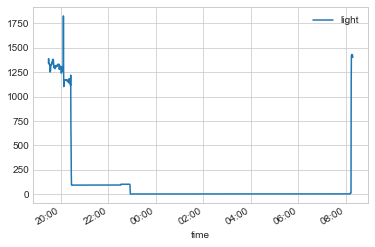

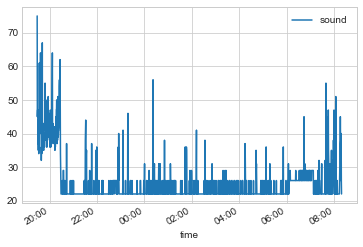

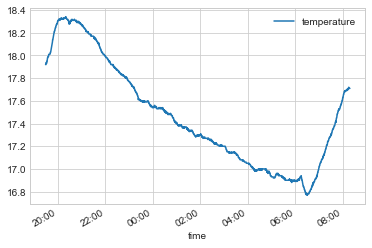

In [59]:
%matplotlib inline
import pandas as pd
from matplotlib.dates import DateFormatter

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

df = pd.DataFrame(data, columns = ['time','light','movement', 'sound', 'temperature'])

#convert time portion to datetime
df['time'] = pd.to_datetime(df['time'].str.split().str[-1])
type(df['time'])

# plot light
lightplot = df.plot.line(x='time', y='light')

#reformat ticks as HH:MM
hh_mm = DateFormatter('%H:%M')
lightplot.xaxis.set_major_formatter(hh_mm)

#plot sound
soundplot = df.plot.line(x='time', y='sound')
soundplot.xaxis.set_major_formatter(hh_mm)

#plot temperature
tempplot = df.plot.line(x='time', y='temperature')
tempplot.xaxis.set_major_formatter(hh_mm)


In [ ]:
#get all session and append to dataframe

sensor_data = sens

# Get session details
for session in sessions['_embedded']['sessions']:
   # Session must be requested one by one with session and user_id to get 30s data
    session = SAS.get('/v1/sessions/{}'.format(session['session_id']), 
              params={'user_id':user['id'], 'embed':['sleep_analysis.hypnogram',
                                                     'sleep_analysis.epoch_data',
                                                     'sleep_analysis.report']}).json()
                                   
     sensor_data = session['_embedded']['sleep_analysis']['epoch_data']  # Sensor data (30s resolution)
     hypnogram = session['_embedded']['sleep_analysis']['hypnogram']     # Sleep stages (30s resolution)
     report = session['_embedded']['sleep_analysis']['report']           # Report for the night (nightly resolution)
    data1.loc[len(data1)] = new
print(data1) 
    
break
df_list = []
for url in urls:
    data = requests.get(url)
    data_json = data.json()

    df = pd.DataFrame(data_json['query']['results']['quote'])
    df_list.append(df)

quote_df = pd.concat(df_list)
quote_df.to_csv('stocks.csv')

In [52]:
data1 = pd.DataFrame({'time':(),'temperature':()})
#print(data1)
data=[]
#make a dataset
for session in sessions['_embedded']['sessions']:
        # Session must be requested one by one with session and user_id to get 30s data
        session = SAS.get('/v1/sessions/{}'.format(session['session_id']), 
                          params={'user_id':user['id'], 'embed':['sleep_analysis.hypnogram',
                                                                 'sleep_analysis.epoch_data',
                                                                 'sleep_analysis.report']}).json()
                                   
        sensor_data = session['_embedded']['sleep_analysis']['epoch_data']  # Sensor data (30s resolution)
        hypnogram = session['_embedded']['sleep_analysis']['hypnogram']     # Sleep stages (30s resolution)
        time=hypnogram['timestamp']  #from hypnogram only timestamp
        temperature=sensor_data['temperature_ambient']
        data=tuple(zip(time,temperature))
        #data1.append(data)
        return data
                     

data = []
for i in range(5):
    data.append(dict(zip(time, temperature)))
df = pd.DataFrame(data)
print(df)

SyntaxError: 'return' outside function (Temp/ipykernel_17652/1606296656.py, line 18)

In [57]:
import numpy as np
np.random.seed(2015)
data = []
for session in sessions['_embedded']['sessions']:
    
        session = SAS.get('/v1/sessions/{}'.format(session['session_id']), 
                          params={'user_id':user['id'], 'embed':['sleep_analysis.hypnogram',
                                                                 'sleep_analysis.epoch_data',
                                                                 'sleep_analysis.report']}).json()
                                   
        
        time = session['_embedded']['sleep_analysis']['hypnogram']['timestamp']     # time 30s
        temperature = session['_embedded']['sleep_analysis']['epoch_data']['temperature_ambient']
        data.append(dict(zip(time, temperature)))
df = pd.DataFrame(data)
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
GET /v1/sessions

In [66]:
mydata = SAS.get('/v1/sessions/{}')

In [67]:
print(mydata)

<Response [404]>
